<a href="https://colab.research.google.com/github/dariobublitz/DS/blob/main/AlgoritmoML_MVP_Bublitz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Algortimo SVM

In [163]:
import pandas as pd
import numpy as np

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
#load dataset 
permanece= pd.read_csv('/content/drive/MyDrive/colab/Bank_Customer_Churn_Prediction.csv')
permanece.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [166]:
permanece.shape

(10000, 12)

In [167]:
#chequeo de nulos
permanece.isnull().sum()


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Chequeo de variables determinadno cuales son categoricas y cuales numericas

In [168]:
#chequeo de variables
permanece.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [169]:
permanece.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [170]:
#seleccion de variables categoricas

cat_columns = permanece.select_dtypes(include='object').columns
numeric_columns = permanece.select_dtypes(include=np.number).columns

Vamos a chequear la cantidad de valores diferentes en cada categorica.

In [171]:
#chequeo de dimensionalidad de variables categoricas
lista = []
#loop por columnas categoricas
for col in cat_columns:
  info = (col, permanece[col].nunique(), permanece[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature', 'cantidad', 'valores'])

,feature,cantidad,valores
0,country,3,"[France, Spain, Germany]"
1,gender,2,"[Female, Male]"


## Transformacion de categórica a numérica:
1. OrdinalEncoder
2. One Hot encoder

### La pregunta que me hice es *¿hay diferencia cuando hacemos una transformación de categórica a numérica cuando usamos <font color='#d776c3'>`OrdinalEncoder o One hot encoder`</font>? ¿hay diferencia cuando usamos diferentes "ordenaciones"?* 

### Generacion de modelos

1. Imput y targuet
2. Realizamos un split
2. Transformacion de valores de preproceso para train dataset
3. Entrenamiento 
4. Transformacion en base a lo anterior en el test
5. Predicción
6. Métrica



In [172]:
#chequeo de desbalanceo
permanece.churn.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

In [173]:
#1. imput y target

X = permanece.drop(['customer_id','churn'], axis=1)
y = permanece['churn']

#2. split de modelo
from sklearn.model_selection import train_test_split

Xx_train , Xx_test, yy_train, yy_test = train_test_split(X, y , test_size=0.2, random_state=10, stratify=y)

print(Xx_train.shape, yy_train.shape,Xx_test.shape , yy_test.shape)

(8000, 10) (8000,) (2000, 10) (2000,)


In [174]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [175]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


In [176]:
yy_train.head()

4498    0
9654    0
4431    0
7206    0
5214    1
Name: churn, dtype: int64

In [177]:
yy_test.head()

2495    1
5652    0
4081    0
2152    1
641     0
Name: churn, dtype: int64

# <font color='Yellow'>1.a OrdinalEncoder
<font color='#d776c3'>sklearn.preprocessing 

In [178]:
cat_columns

Index(['country', 'gender'], dtype='object')

In [179]:
from sklearn.preprocessing import OrdinalEncoder

#generacion del encoder 
le = OrdinalEncoder(handle_unknown='use_encoded_value' , #use cuando tenes valores desconocidos 
                    unknown_value=-1) # asignacion a valores desconocidos 

# generacion de numeros por cada categórico 
le.fit(Xx_train[cat_columns])
X1_train=Xx_train.copy()
#transformacion de las categoricas en train dataset
X1_train[cat_columns] = le.transform(X1_train[cat_columns])
X1_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0.0,1.0,30,2,131406.56,1,1,1,47952.45
9654,834,2.0,1.0,34,5,0.00,2,0,0,53437.10
4431,616,1.0,0.0,42,6,117899.95,2,0,0,150266.81
7206,753,1.0,0.0,47,1,131160.85,1,1,0,197444.69
5214,740,1.0,0.0,57,3,113386.36,2,1,1,65121.63


In [180]:
# Obtener las categorías asignadas a la variable 'country' y 'gender'
country_categories = le.categories_[0]
gender_categories = le.categories_[1]

# Crear un diccionario que mapea cada categoría a su número correspondiente
country_dict = dict(zip(country_categories, range(len(country_categories))))
gender_dict = dict(zip(gender_categories, range(len(gender_categories))))

# Imprimir los diccionarios resultantes
print(country_dict)
print(gender_dict)


{'France': 0, 'Germany': 1, 'Spain': 2}
{'Female': 0, 'Male': 1}


Cuando una variable tiene 3 categorías se puede ordenar de 3! maneras (mate del secundario). como son dos categóricas con tres y dos clases lo que me da 3!x2!=12 maneras(esas son las letras,,,<font color='Yellow'> A, B, C...</font>). 

In [181]:
#@title #posibles "Arreglo de variables"
import pandas as pd

a = {
  "0": ['France', 'Female '],
  "1": ['Germany', 'Male'],
  "2": ['Spain','NaN']
}

#load data into a DataFrame object:
A = pd.DataFrame(a, index=['country','gender'])
print('A -------------------------------- A')
print(A) 
print('==================================')
b = {
  "0": ['France', 'Male'],
  "1": ['Germany','Female ' ],
  "2": ['Spain','NaN']
}

#load data into a DataFrame object:
B = pd.DataFrame(b, index=['country','gender'])
print('B -------------------------------- B')
print(B) 
print('==================================')
#---------------------------------------------1
c = {
  "0": ['France', 'Female '],
  "1": ['Spain', 'Male'],
  "2": ['Germany','NaN']
}

#load data into a DataFrame object:
C = pd.DataFrame(c, index=['country','gender'])
print('C -------------------------------- C')
print(C) 
print('==================================')
d = {
  "0": ['France', 'Male'],
  "1": ['Spain','Female ' ],
  "2": ['Germany','NaN']
}

#load data into a DataFrame object:
D = pd.DataFrame(d, index=['country','gender'])
print('D -------------------------------- D')
print(D) 
print('==================================')
#---------------------------------------------2
e = {
  "0": ['Germany', 'Female '],
  "1": ['France', 'Male'],
  "2": ['Spain','NaN']
}

#load data into a DataFrame object:
E = pd.DataFrame(e, index=['country','gender'])
print('E -------------------------------- E')
print(E) 
print('==================================')
f = {
  "0": ['Germany', 'Male'],
  "1": ['France','Female ' ],
  "2": ['Spain','NaN']
}

#load data into a DataFrame object:
F= pd.DataFrame(f, index=['country','gender'])
print('F -------------------------------- F')
print(F) 
print('==================================')
#---------------------------------------------3
g = {
  "0": ['Spain', 'Female '],
  "1": ['France', 'Male'],
  "2": ['Germany','NaN']
}

#load data into a DataFrame object:
G = pd.DataFrame(g, index=['country','gender'])
print('G -------------------------------- G')
print(G) 
print('==================================')
h = {
  "0": ['Spain', 'Male'],
  "1": ['France','Female ' ],
  "2": ['Germany','NaN']
}

#load data into a DataFrame object:
H = pd.DataFrame(h, index=['country','gender'])
print('H -------------------------------- H')
print(H) 
print('==================================')
#---------------------------------------------4
i = {
  "0": ['Germany', 'Female '],
  "1": ['Spain', 'Male'],
  "2": ['France','NaN']
}
 
#load data into a DataFrame object:
I = pd.DataFrame(i, index=['country','gender'])
print('I -------------------------------- I')
print(I) 
print('==================================')
j = {
  "0": ['Germany', 'Male'],
  "1": ['Spain','Female ' ],
  "2": ['France','NaN']
}

#load data into a DataFrame object:
J = pd.DataFrame(j, index=['country','gender'])
print('J -------------------------------- J')
print(J) 
print('==================================')
#---------------------------------------------5
k = {
  "0": ['Spain', 'Female '],
  "1": ['Germany', 'Male'],
  "2": ['France','NaN']
}

#load data into a DataFrame object:
K = pd.DataFrame(k, index=['country','gender'])
print('K -------------------------------- K')
print(K) 
print('==================================')
l = {
  "0": ['Spain', 'Male'],
  "1": ['Germany','Female ' ],
  "2": ['France','NaN']
}

#load data into a DataFrame object:
L = pd.DataFrame(l, index=['country','gender'])
print('L -------------------------------- L')
print(L) 
print('==================================')
#---------------------------------------------

A -------------------------------- A
               0        1      2
country   France  Germany  Spain
gender   Female      Male    NaN
B -------------------------------- B
              0        1      2
country  France  Germany  Spain
gender     Male  Female     NaN
C -------------------------------- C
               0      1        2
country   France  Spain  Germany
gender   Female    Male      NaN
D -------------------------------- D
              0        1        2
country  France    Spain  Germany
gender     Male  Female       NaN
E -------------------------------- E
               0       1      2
country  Germany  France  Spain
gender   Female     Male    NaN
F -------------------------------- F
               0        1      2
country  Germany   France  Spain
gender      Male  Female     NaN
G -------------------------------- G
               0       1        2
country    Spain  France  Germany
gender   Female     Male      NaN
H -------------------------------- H
           

In [182]:
X1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4498 to 3138
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      8000 non-null   int64  
 1   country           8000 non-null   float64
 2   gender            8000 non-null   float64
 3   age               8000 non-null   int64  
 4   tenure            8000 non-null   int64  
 5   balance           8000 non-null   float64
 6   products_number   8000 non-null   int64  
 7   credit_card       8000 non-null   int64  
 8   active_member     8000 non-null   int64  
 9   estimated_salary  8000 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 687.5 KB


#Entrenamiento del modelo SVM 1.a

In [183]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X1_train, yy_train)

SVC(kernel='linear', random_state=123)

## El `random_state` es un parámetro que se encuentra en muchos algoritmos de aprendizaje automático de <font color="#d776c3">`Scikit-learn`</font>
 incluidos los árboles de decisión y los bosques aleatorios. Este parámetro controla la aleatoriedad en el algoritmo, lo que permite que los resultados sean reproducibles cuando se vuelve a ejecutar el código con el mismo `random_state.`

En el contexto de los árboles de decisión y los bosques aleatorios, el `random_state` afecta la forma en que se seleccionan las características y los umbrales para las divisiones en cada nodo del árbol. Al establecer un `random_state` específico, te aseguras de que el proceso de selección de características y umbrales siga el mismo patrón de aleatoriedad cada vez que se ejecuta el algoritmo. Esto es útil cuando deseas comparar diferentes modelos o cuando deseas compartir tus resultados con otras personas que puedan ejecutar el mismo código en sus propias computadoras.

Si no estableces el `random_state`, el algoritmo utilizará una fuente de aleatoriedad no determinista (basada en el reloj del sistema u otros factores externos) y los resultados pueden variar cada vez que se ejecuta el código. Esto puede dificultar la comparación de modelos y la reproducción de resultados.

En resumen, el random_state es útil para garantizar la reproducibilidad de tus resultados y para asegurarte de que los cambios en el rendimiento del modelo se deban a cambios en los parámetros o en los datos, y no a diferencias aleatorias en la forma en que se entrenó el modelo.



In [188]:
X1_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0.0,1.0,30,2,131406.56,1,1,1,47952.45
9654,834,2.0,1.0,34,5,0.00,2,0,0,53437.10
4431,616,1.0,0.0,42,6,117899.95,2,0,0,150266.81
7206,753,1.0,0.0,47,1,131160.85,1,1,0,197444.69
5214,740,1.0,0.0,57,3,113386.36,2,1,1,65121.63


In [189]:
#trasnfomracion test
X1_test=Xx_test.copy()
X1_test[cat_columns] = le.transform(X1_test[cat_columns])

In [190]:
X1_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1.0,0.0,56,2,111920.13,3,1,0,197634.11
5652,691,0.0,0.0,29,9,0.00,2,0,0,199635.93
4081,721,2.0,1.0,33,5,0.00,2,0,1,117626.90
2152,745,0.0,0.0,55,9,110123.59,1,0,1,51548.14
641,706,0.0,0.0,29,5,112564.62,1,1,0,42334.38


In [191]:
pred1 = classifier.predict(X1_test)

testing1 = pd.DataFrame({'y_true':yy_test, 'pred1':pred1})
#metrica

In [192]:
testing1

,y_true,pred1
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM)

Evaluacion final del modelo en el test



In [193]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testing1['y_true'], testing1['pred1']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.26      0.05      0.09       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [315]:
f1_sc1=f1_score(testing1['y_true'], testing1['pred1'])
f1_sc.append(f1_sc1)
f1_sc1,f1_sc

(0.08624229979466119, [0.08624229979466119])

La métrica F1-score es una medida de la precisión y la exhaustividad (recall) en la clasificación. Se puede observar que la precisión y la exhaustividad para la clase 1 son relativamente bajas, con 0.26 y 0.05, respectivamente. Como resultado, el F1-score para la clase 1 también es bajo, en 0.0862.

El F1-score es especialmente útil cuando las clases están desequilibradas, como en este caso. La clase 0 tiene 1593 muestras, mientras que la clase 1 tiene solo 407.(manteniendo la proporción original) El modelo tiene un buen rendimiento en la clasificación de la clase 0, con un F1-score de 0.87, pero no es tan efectivo en la clasificación de la clase 1.

El F1-score promedio ponderado (weighted avg) es de 0.71, lo que indica que el modelo tiene un rendimiento moderado en general, pero es mucho mejor en la clasificación de la clase 0 en comparación con la clase 1.

# <font color='Yellow'>1.b OrdinalEncoder
<font color='#d776c3'>category_encoders

# <font color='yellow'> A

In [195]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [196]:
f1_sc=[]
#f1_sc.append(elmnt)

In [197]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderA = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'France': 0, 
                                                        'Germany': 1, 
                                                        'Spain': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderA.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainA_encoded = encoderA.transform(Xx_train)
X_testA_encoded = encoderA.transform(Xx_test)

In [198]:
X_trainA_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0,1,30,2,131406.56,1,1,1,47952.45
9654,834,2,1,34,5,0.00,2,0,0,53437.10
4431,616,1,0,42,6,117899.95,2,0,0,150266.81
7206,753,1,0,47,1,131160.85,1,1,0,197444.69
5214,740,1,0,57,3,113386.36,2,1,1,65121.63


In [199]:
X_testA_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1,0,56,2,111920.13,3,1,0,197634.11
5652,691,0,0,29,9,0.00,2,0,0,199635.93
4081,721,2,1,33,5,0.00,2,0,1,117626.90
2152,745,0,0,55,9,110123.59,1,0,1,51548.14
641,706,0,0,29,5,112564.62,1,1,0,42334.38


Las variables originales<font color='yellow'> NO FUERON TOCADAS

In [200]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [201]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


#Entrenamiento del modelo (SVM) <font color='yellow'> A

In [202]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainA_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [203]:
predA = classifier.predict(X_testA_encoded)

testingA = pd.DataFrame({'y_true':yy_test, 'predA':predA})
#metrica

In [204]:
testingA

,y_true,predA
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> A

Evaluacion final del modelo en el test



In [205]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingA['y_true'], testingA['predA']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.26      0.05      0.09       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [316]:
f1_scA=f1_score(testingA['y_true'], testingA['predA'])
f1_sc.append(f1_scA)
f1_scA,f1_sc

(0.08624229979466119, [0.08624229979466119, 0.08624229979466119])

# <font color='yellow'> B

In [207]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderB = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'France': 0, 
                                                        'Germany': 1, 
                                                        'Spain': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderB.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainB_encoded = encoderB.transform(Xx_train)
X_testB_encoded = encoderB.transform(Xx_test)

In [208]:
X_trainB_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0,0,30,2,131406.56,1,1,1,47952.45
9654,834,2,0,34,5,0.00,2,0,0,53437.10
4431,616,1,1,42,6,117899.95,2,0,0,150266.81
7206,753,1,1,47,1,131160.85,1,1,0,197444.69
5214,740,1,1,57,3,113386.36,2,1,1,65121.63


In [209]:
X_testB_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1,1,56,2,111920.13,3,1,0,197634.11
5652,691,0,1,29,9,0.00,2,0,0,199635.93
4081,721,2,0,33,5,0.00,2,0,1,117626.90
2152,745,0,1,55,9,110123.59,1,0,1,51548.14
641,706,0,1,29,5,112564.62,1,1,0,42334.38


In [210]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainB_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [211]:
predB = classifier.predict(X_testB_encoded)

testingB = pd.DataFrame({'y_true':yy_test, 'predB':predB})
#metrica

In [212]:
testingB

,y_true,predB
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> B

Evaluacion final del modelo en el test



In [213]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingB['y_true'], testingB['predB']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [317]:
f1_scB=f1_score(testingB['y_true'], testingB['predB'])
f1_sc.append(f1_scB)
f1_scB,f1_sc

(0.08264462809917354,
 [0.08624229979466119, 0.08624229979466119, 0.08264462809917354])

# <font color='yellow'> C

In [215]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderC = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'France': 0, 
                                                        'Spain': 1, 
                                                        'Germany': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderC.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainC_encoded = encoderC.transform(Xx_train)
X_testC_encoded = encoderC.transform(Xx_test)

In [216]:
X_trainC_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0,1,30,2,131406.56,1,1,1,47952.45
9654,834,1,1,34,5,0.00,2,0,0,53437.10
4431,616,2,0,42,6,117899.95,2,0,0,150266.81
7206,753,2,0,47,1,131160.85,1,1,0,197444.69
5214,740,2,0,57,3,113386.36,2,1,1,65121.63


In [217]:
X_testC_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,2,0,56,2,111920.13,3,1,0,197634.11
5652,691,0,0,29,9,0.00,2,0,0,199635.93
4081,721,1,1,33,5,0.00,2,0,1,117626.90
2152,745,0,0,55,9,110123.59,1,0,1,51548.14
641,706,0,0,29,5,112564.62,1,1,0,42334.38


In [218]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainC_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [219]:
predC = classifier.predict(X_testC_encoded)

testingC = pd.DataFrame({'y_true':yy_test, 'predC':predC})
#metrica

In [220]:
testingC

,y_true,predC
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> C

Evaluacion final del modelo en el test



In [221]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingC['y_true'], testingC['predC']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [318]:
f1_scC=f1_score(testingC['y_true'], testingC['predC'])
f1_sc.append(f1_scC)
f1_scC,f1_sc

(0.07916666666666666,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666])

# <font color='yellow'> D

In [223]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder


# instanciar el encoder ordinal
encoderD = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'France': 0, 
                                                        'Spain': 1, 
                                                        'Germany': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderD.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainD_encoded = encoderD.transform(Xx_train)
X_testD_encoded = encoderD.transform(Xx_test)

In [224]:
X_trainD_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0,0,30,2,131406.56,1,1,1,47952.45
9654,834,1,0,34,5,0.00,2,0,0,53437.10
4431,616,2,1,42,6,117899.95,2,0,0,150266.81
7206,753,2,1,47,1,131160.85,1,1,0,197444.69
5214,740,2,1,57,3,113386.36,2,1,1,65121.63


In [225]:
X_testD_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,2,1,56,2,111920.13,3,1,0,197634.11
5652,691,0,1,29,9,0.00,2,0,0,199635.93
4081,721,1,0,33,5,0.00,2,0,1,117626.90
2152,745,0,1,55,9,110123.59,1,0,1,51548.14
641,706,0,1,29,5,112564.62,1,1,0,42334.38


In [226]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainD_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [227]:
predD = classifier.predict(X_testD_encoded)

testingD = pd.DataFrame({'y_true':yy_test, 'predD':predD})
#metrica

In [228]:
testingD

,y_true,predD
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> D

Evaluacion final del modelo en el test



In [229]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingD['y_true'], testingD['predD']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.27      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [319]:

f1_scD=f1_score(testingD['y_true'], testingD['predD'])
f1_sc.append(f1_scD)
f1_scD,f1_sc

(0.08316008316008315,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666,
  0.08316008316008315])

# <font color='yellow'> E

In [231]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderE = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Germany': 0, 
                                                        'France': 1, 
                                                        'Spain': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderE.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainE_encoded = encoderE.transform(Xx_train)
X_testE_encoded = encoderE.transform(Xx_test)

In [232]:
X_trainE_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,1,1,30,2,131406.56,1,1,1,47952.45
9654,834,2,1,34,5,0.00,2,0,0,53437.10
4431,616,0,0,42,6,117899.95,2,0,0,150266.81
7206,753,0,0,47,1,131160.85,1,1,0,197444.69
5214,740,0,0,57,3,113386.36,2,1,1,65121.63


In [233]:
X_testE_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,0,0,56,2,111920.13,3,1,0,197634.11
5652,691,1,0,29,9,0.00,2,0,0,199635.93
4081,721,2,1,33,5,0.00,2,0,1,117626.90
2152,745,1,0,55,9,110123.59,1,0,1,51548.14
641,706,1,0,29,5,112564.62,1,1,0,42334.38


In [234]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainE_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [235]:
predE = classifier.predict(X_testE_encoded)

testingE = pd.DataFrame({'y_true':yy_test, 'predE':predE})
#metrica

In [236]:
testingE

,y_true,predE
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> E

Evaluacion final del modelo en el test



In [237]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingE['y_true'], testingE['predE']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.25      0.04      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.47      2000
weighted avg       0.69      0.78      0.71      2000



In [320]:

f1_scE=f1_score(testingE['y_true'], testingE['predE'])
f1_sc.append(f1_scE)
f1_scE,f1_sc

(0.07531380753138076,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666,
  0.08316008316008315,
  0.07531380753138076])

# <font color='yellow'> F

In [239]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderF = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Germany': 0, 
                                                        'France': 1, 
                                                        'Spain': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderF.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainF_encoded = encoderF.transform(Xx_train)
X_testF_encoded = encoderF.transform(Xx_test)

In [240]:
X_trainF_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,1,0,30,2,131406.56,1,1,1,47952.45
9654,834,2,0,34,5,0.00,2,0,0,53437.10
4431,616,0,1,42,6,117899.95,2,0,0,150266.81
7206,753,0,1,47,1,131160.85,1,1,0,197444.69
5214,740,0,1,57,3,113386.36,2,1,1,65121.63


In [241]:
X_testF_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,0,1,56,2,111920.13,3,1,0,197634.11
5652,691,1,1,29,9,0.00,2,0,0,199635.93
4081,721,2,0,33,5,0.00,2,0,1,117626.90
2152,745,1,1,55,9,110123.59,1,0,1,51548.14
641,706,1,1,29,5,112564.62,1,1,0,42334.38


In [242]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainF_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [243]:
predF = classifier.predict(X_testF_encoded)

testingF = pd.DataFrame({'y_true':yy_test, 'predF':predF})
#metrica

In [244]:
testingF

,y_true,predF
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> F

Evaluacion final del modelo en el test



In [245]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingF['y_true'], testingF['predF']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [321]:

f1_scF=f1_score(testingF['y_true'], testingF['predF'])
f1_sc.append(f1_scF)
f1_scF,f1_sc

(0.07900207900207899,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666,
  0.08316008316008315,
  0.07531380753138076,
  0.07900207900207899])

# <font color='yellow'> G

In [247]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderG = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Spain': 0, 
                                                        'France': 1, 
                                                        'Germany': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderG.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainG_encoded = encoderG.transform(Xx_train)
X_testG_encoded = encoderG.transform(Xx_test)

In [248]:
X_trainG_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,1,1,30,2,131406.56,1,1,1,47952.45
9654,834,0,1,34,5,0.00,2,0,0,53437.10
4431,616,2,0,42,6,117899.95,2,0,0,150266.81
7206,753,2,0,47,1,131160.85,1,1,0,197444.69
5214,740,2,0,57,3,113386.36,2,1,1,65121.63


In [249]:
X_testG_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,2,0,56,2,111920.13,3,1,0,197634.11
5652,691,1,0,29,9,0.00,2,0,0,199635.93
4081,721,0,1,33,5,0.00,2,0,1,117626.90
2152,745,1,0,55,9,110123.59,1,0,1,51548.14
641,706,1,0,29,5,112564.62,1,1,0,42334.38


In [250]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainG_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [251]:
predG = classifier.predict(X_testG_encoded)

testingG = pd.DataFrame({'y_true':yy_test, 'predG':predG})
#metrica

In [252]:
testingG

,y_true,predG
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> G

Evaluacion final del modelo en el test



In [253]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingG['y_true'], testingG['predG']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.04      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [322]:

f1_scG=f1_score(testingG['y_true'], testingG['predG'])
f1_sc.append(f1_scG)
f1_scG,f1_sc

(0.07547169811320756,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666,
  0.08316008316008315,
  0.07531380753138076,
  0.07900207900207899,
  0.07547169811320756])

# <font color='yellow'> H

In [255]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderH = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Spain': 0, 
                                                        'France': 1, 
                                                        'Germany': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderH.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainH_encoded = encoderH.transform(Xx_train)
X_testH_encoded = encoderH.transform(Xx_test)

In [256]:
X_trainH_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,1,0,30,2,131406.56,1,1,1,47952.45
9654,834,0,0,34,5,0.00,2,0,0,53437.10
4431,616,2,1,42,6,117899.95,2,0,0,150266.81
7206,753,2,1,47,1,131160.85,1,1,0,197444.69
5214,740,2,1,57,3,113386.36,2,1,1,65121.63


In [257]:
X_testH_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,2,1,56,2,111920.13,3,1,0,197634.11
5652,691,1,1,29,9,0.00,2,0,0,199635.93
4081,721,0,0,33,5,0.00,2,0,1,117626.90
2152,745,1,1,55,9,110123.59,1,0,1,51548.14
641,706,1,1,29,5,112564.62,1,1,0,42334.38


In [258]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainB_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [259]:
predH = classifier.predict(X_testH_encoded)

testingH = pd.DataFrame({'y_true':yy_test, 'predH':predH})
#metrica

In [260]:
testingH

,y_true,predH
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM)  <font color='yellow'> H

Evaluacion final del modelo en el test



In [261]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingH['y_true'], testingH['predH']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [323]:

f1_scH=f1_score(testingH['y_true'], testingH['predH'])
f1_sc.append(f1_scH)
f1_scH,f1_sc

(0.08281573498964802,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666,
  0.08316008316008315,
  0.07531380753138076,
  0.07900207900207899,
  0.07547169811320756,
  0.08281573498964802])

# <font color='yellow'> I

In [263]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderI = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Germany': 0, 
                                                        'Spain': 1, 
                                                        'France': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderI.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainI_encoded = encoderI.transform(Xx_train)
X_testI_encoded = encoderI.transform(Xx_test)

In [264]:
X_trainI_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,2,1,30,2,131406.56,1,1,1,47952.45
9654,834,1,1,34,5,0.00,2,0,0,53437.10
4431,616,0,0,42,6,117899.95,2,0,0,150266.81
7206,753,0,0,47,1,131160.85,1,1,0,197444.69
5214,740,0,0,57,3,113386.36,2,1,1,65121.63


In [265]:
X_testI_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,0,0,56,2,111920.13,3,1,0,197634.11
5652,691,2,0,29,9,0.00,2,0,0,199635.93
4081,721,1,1,33,5,0.00,2,0,1,117626.90
2152,745,2,0,55,9,110123.59,1,0,1,51548.14
641,706,2,0,29,5,112564.62,1,1,0,42334.38


In [266]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainI_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [267]:
predI = classifier.predict(X_testI_encoded)

testingI = pd.DataFrame({'y_true':yy_test, 'predI':predI})
#metrica

In [268]:
testingI

,y_true,predI
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> I

Evaluacion final del modelo en el test



In [269]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingI['y_true'], testingI['predI']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.27      0.05      0.09       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [324]:

f1_scI=f1_score(testingI['y_true'], testingI['predI'])
f1_sc.append(f1_scI)
f1_scI,f1_sc

(0.08641975308641975,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666,
  0.08316008316008315,
  0.07531380753138076,
  0.07900207900207899,
  0.07547169811320756,
  0.08281573498964802,
  0.08641975308641975])

# <font color='yellow'> J

In [271]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderJ = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Germany': 0, 
                                                        'Spain': 1, 
                                                        'France': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderJ.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainJ_encoded = encoderJ.transform(Xx_train)
X_testJ_encoded = encoderJ.transform(Xx_test)

In [272]:
X_trainJ_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,2,0,30,2,131406.56,1,1,1,47952.45
9654,834,1,0,34,5,0.00,2,0,0,53437.10
4431,616,0,1,42,6,117899.95,2,0,0,150266.81
7206,753,0,1,47,1,131160.85,1,1,0,197444.69
5214,740,0,1,57,3,113386.36,2,1,1,65121.63


In [273]:
X_testJ_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,0,1,56,2,111920.13,3,1,0,197634.11
5652,691,2,1,29,9,0.00,2,0,0,199635.93
4081,721,1,0,33,5,0.00,2,0,1,117626.90
2152,745,2,1,55,9,110123.59,1,0,1,51548.14
641,706,2,1,29,5,112564.62,1,1,0,42334.38


In [274]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainJ_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [275]:
predJ = classifier.predict(X_testJ_encoded)

testingJ = pd.DataFrame({'y_true':yy_test, 'predJ':predJ})
#metrica

In [276]:
testingJ

,y_true,predJ
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> J

Evaluacion final del modelo en el test



In [277]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingJ['y_true'], testingJ['predJ']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.04      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [325]:

f1_scJ=f1_score(testingJ['y_true'], testingJ['predJ'])
f1_sc.append(f1_scJ)
f1_scJ,f1_sc

(0.07547169811320756,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666,
  0.08316008316008315,
  0.07531380753138076,
  0.07900207900207899,
  0.07547169811320756,
  0.08281573498964802,
  0.08641975308641975,
  0.07547169811320756])

# <font color='yellow'> K

In [279]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderK = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Spain': 0, 
                                                        'Germany': 1, 
                                                        'France': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderK.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainK_encoded = encoderK.transform(Xx_train)
X_testK_encoded = encoderK.transform(Xx_test)

In [280]:
X_trainK_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,2,1,30,2,131406.56,1,1,1,47952.45
9654,834,0,1,34,5,0.00,2,0,0,53437.10
4431,616,1,0,42,6,117899.95,2,0,0,150266.81
7206,753,1,0,47,1,131160.85,1,1,0,197444.69
5214,740,1,0,57,3,113386.36,2,1,1,65121.63


In [281]:
X_testK_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1,0,56,2,111920.13,3,1,0,197634.11
5652,691,2,0,29,9,0.00,2,0,0,199635.93
4081,721,0,1,33,5,0.00,2,0,1,117626.90
2152,745,2,0,55,9,110123.59,1,0,1,51548.14
641,706,2,0,29,5,112564.62,1,1,0,42334.38


In [282]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainK_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [283]:
predK = classifier.predict(X_testK_encoded)

testingK = pd.DataFrame({'y_true':yy_test, 'predK':predK})
#metrica

In [284]:
testingK

,y_true,predK
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> K

Evaluacion final del modelo en el test



In [285]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingK['y_true'], testingK['predK']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.27      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [326]:

f1_scK=f1_score(testingK['y_true'], testingK['predK'])
f1_sc.append(f1_scK)
f1_scK,f1_sc

(0.0794979079497908,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666,
  0.08316008316008315,
  0.07531380753138076,
  0.07900207900207899,
  0.07547169811320756,
  0.08281573498964802,
  0.08641975308641975,
  0.07547169811320756,
  0.0794979079497908])

# <font color='yellow'> L

In [287]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderL = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Spain': 0, 
                                                        'Germany': 1, 
                                                        'France': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderL.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainL_encoded = encoderL.transform(Xx_train)
X_testL_encoded = encoderL.transform(Xx_test)

In [288]:
X_trainL_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,2,0,30,2,131406.56,1,1,1,47952.45
9654,834,0,0,34,5,0.00,2,0,0,53437.10
4431,616,1,1,42,6,117899.95,2,0,0,150266.81
7206,753,1,1,47,1,131160.85,1,1,0,197444.69
5214,740,1,1,57,3,113386.36,2,1,1,65121.63


In [289]:
X_testL_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1,1,56,2,111920.13,3,1,0,197634.11
5652,691,2,1,29,9,0.00,2,0,0,199635.93
4081,721,0,0,33,5,0.00,2,0,1,117626.90
2152,745,2,1,55,9,110123.59,1,0,1,51548.14
641,706,2,1,29,5,112564.62,1,1,0,42334.38


In [290]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_trainL_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [291]:
predL = classifier.predict(X_testL_encoded)

testingL = pd.DataFrame({'y_true':yy_test, 'predL':predL})
#metrica

In [292]:
testingL

,y_true,predL
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> L

Evaluacion final del modelo en el test



In [293]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingL['y_true'], testingL['predL']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [327]:

f1_scL=f1_score(testingL['y_true'], testingL['predL'])
f1_sc.append(f1_scL)
f1_scL,f1_sc

(0.07933194154488517,
 [0.08624229979466119,
  0.08624229979466119,
  0.08264462809917354,
  0.07916666666666666,
  0.08316008316008315,
  0.07531380753138076,
  0.07900207900207899,
  0.07547169811320756,
  0.08281573498964802,
  0.08641975308641975,
  0.07547169811320756,
  0.0794979079497908,
  0.07933194154488517])

In [328]:
print(len(f1_sc))

13


In [329]:
f1_sc

[0.08624229979466119,
 0.08624229979466119,
 0.08264462809917354,
 0.07916666666666666,
 0.08316008316008315,
 0.07531380753138076,
 0.07900207900207899,
 0.07547169811320756,
 0.08281573498964802,
 0.08641975308641975,
 0.07547169811320756,
 0.0794979079497908,
 0.07933194154488517]

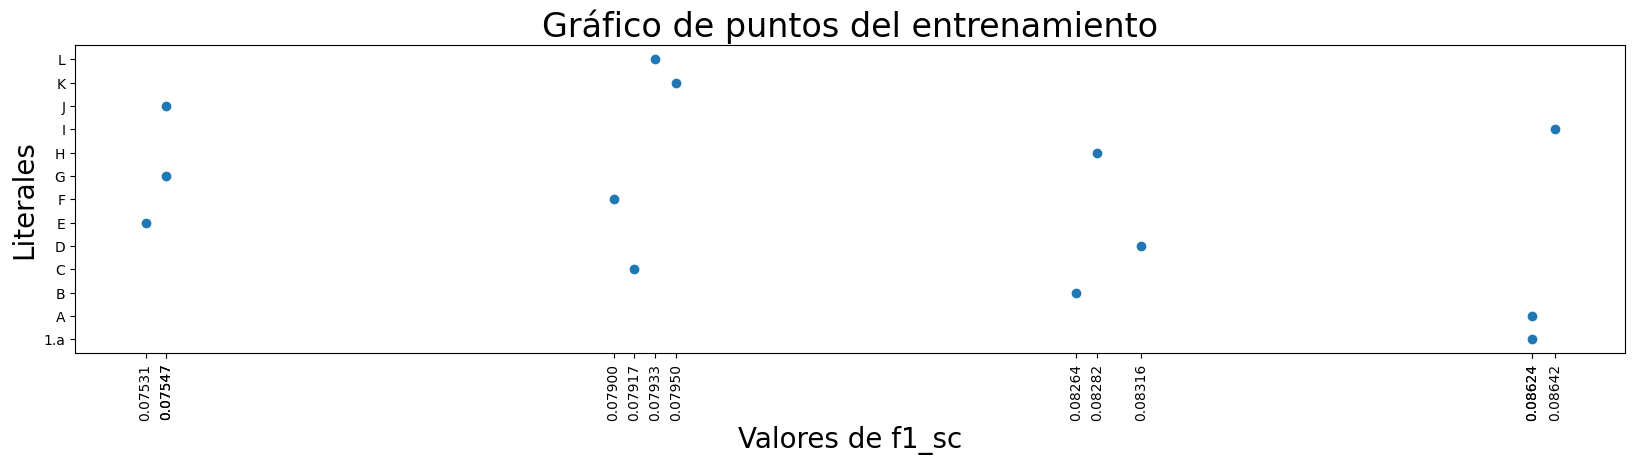

In [331]:
import matplotlib.pyplot as plt

# Definimos los datos de la lista f1_sc
x_vals = ['1.a','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

# Creamos la figura con un tamaño de 20x10
plt.figure(figsize=(20, 4))

# Creamos el gráfico de puntos con los valores de los ejes invertidos
plt.scatter(f1_sc, x_vals)

# Configuramos los ejes y el título
plt.xlabel('Valores de f1_sc',fontsize=20)
plt.ylabel('Literales',fontsize=20)
plt.title('Gráfico de puntos del entrenamiento', fontsize=24)

# Configuramos las etiquetas del eje y
# Configuramos las etiquetas del eje y y rotamos las del eje x
plt.xticks(rotation=90)

plt.xticks(f1_sc)

# Mostramos el gráfico
plt.show()


In [332]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [333]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


In [334]:
yy_train.head()

4498    0
9654    0
4431    0
7206    0
5214    1
Name: churn, dtype: int64

In [335]:
yy_test.head()

2495    1
5652    0
4081    0
2152    1
641     0
Name: churn, dtype: int64

In [336]:
Xx_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4498 to 3138
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      8000 non-null   int64  
 1   country           8000 non-null   object 
 2   gender            8000 non-null   object 
 3   age               8000 non-null   int64  
 4   tenure            8000 non-null   int64  
 5   balance           8000 non-null   float64
 6   products_number   8000 non-null   int64  
 7   credit_card       8000 non-null   int64  
 8   active_member     8000 non-null   int64  
 9   estimated_salary  8000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 687.5+ KB


In [337]:
numeric_columns , type(numeric_columns )

(Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
        'products_number', 'credit_card', 'active_member', 'estimated_salary',
        'churn'],
       dtype='object'),
 pandas.core.indexes.base.Index)

In [338]:
num_col=[ 'credit_score', 'age', 'tenure', 'balance',
        'products_number', 'credit_card', 'active_member', 'estimated_salary']
cat_col=['country','gender']        


# <font color='yellow'>OneHotEncoder

In [339]:

# Importar el OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

Xx_train_ohe=Xx_train.copy()
Xx_test_ohe=Xx_test.copy()
# Generar el encoder
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(Xx_train_ohe[['country','gender'] ])

Xx_train_ohe = ohe.transform(Xx_train_ohe[['country','gender'] ])
Xx_test_ohe = ohe.transform(Xx_test_ohe[['country','gender'] ])
# Ajustar el encoder en el conjunto de entrenamiento

ohe.get_feature_names_out()
#Create a Pandas DataFrame of the hot encoded column
Xx_train_ohe = pd.DataFrame(Xx_train_ohe, columns=ohe.get_feature_names_out())
Xx_test_ohe = pd.DataFrame(Xx_test_ohe, columns=ohe.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Train

In [340]:
Xx_train_ohe.head()

,country_Germany,country_Spain,gender_Male
0,0.0,0.0,1.0
1,0.0,1.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [341]:
Xx_train[num_col].head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,30,2,131406.56,1,1,1,47952.45
9654,834,34,5,0.00,2,0,0,53437.10
4431,616,42,6,117899.95,2,0,0,150266.81
7206,753,47,1,131160.85,1,1,0,197444.69
5214,740,57,3,113386.36,2,1,1,65121.63


In [342]:
# Establecer el índice del DataFrame train
Xx_train = Xx_train.set_index(Xx_train.index, drop=False)
# Establecer el índice del segundo DataFrame
Xx_train_ohe = Xx_train_ohe.set_index(Xx_train.index)

In [343]:
Xx_train_ohe.head()

,country_Germany,country_Spain,gender_Male
4498,0.0,0.0,1.0
9654,0.0,1.0,1.0
4431,1.0,0.0,0.0
7206,1.0,0.0,0.0
5214,1.0,0.0,0.0


In [344]:
# Concatenar las variables numéricas y categóricas transformadas en un solo DataFrame
X_train_encoded = pd.concat([Xx_train[num_col], Xx_train_ohe], axis=1)

In [345]:
Xx_train[num_col].shape, Xx_train_ohe.shape, X_train_encoded.shape

((8000, 8), (8000, 3), (8000, 11))

In [346]:
X_train_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
4498,570,30,2,131406.56,1,1,1,47952.45,0.0,0.0,1.0
9654,834,34,5,0.00,2,0,0,53437.10,0.0,1.0,1.0
4431,616,42,6,117899.95,2,0,0,150266.81,1.0,0.0,0.0
7206,753,47,1,131160.85,1,1,0,197444.69,1.0,0.0,0.0
5214,740,57,3,113386.36,2,1,1,65121.63,1.0,0.0,0.0


## Test

In [362]:
Xx_test_ohe.head()

,country_Germany,country_Spain,gender_Male
2495,1.0,0.0,0.0
5652,0.0,0.0,0.0
4081,0.0,1.0,1.0
2152,0.0,0.0,0.0
641,0.0,0.0,0.0


In [363]:
# Establecer el índice del DataFrame train
Xx_test = Xx_test.set_index(Xx_test.index, drop=False)
# Establecer el índice del segundo DataFrame
Xx_test_ohe = Xx_test_ohe.set_index(Xx_test.index)

In [364]:
# Concatenar las variables numéricas y categóricas transformadas en un solo DataFrame
X_test_encoded = pd.concat([Xx_test[num_col], Xx_test_ohe], axis=1)

In [365]:
X_test_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2495,466,56,2,111920.13,3,1,0,197634.11,1.0,0.0,0.0
5652,691,29,9,0.00,2,0,0,199635.93,0.0,0.0,0.0
4081,721,33,5,0.00,2,0,1,117626.90,0.0,1.0,1.0
2152,745,55,9,110123.59,1,0,1,51548.14,0.0,0.0,0.0
641,706,29,5,112564.62,1,1,0,42334.38,0.0,0.0,0.0


In [366]:
Xx_test_ohe.head()

,country_Germany,country_Spain,gender_Male
2495,1.0,0.0,0.0
5652,0.0,0.0,0.0
4081,0.0,1.0,1.0
2152,0.0,0.0,0.0
641,0.0,0.0,0.0


In [367]:
X_test_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2495,466,56,2,111920.13,3,1,0,197634.11,1.0,0.0,0.0
5652,691,29,9,0.00,2,0,0,199635.93,0.0,0.0,0.0
4081,721,33,5,0.00,2,0,1,117626.90,0.0,1.0,1.0
2152,745,55,9,110123.59,1,0,1,51548.14,0.0,0.0,0.0
641,706,29,5,112564.62,1,1,0,42334.38,0.0,0.0,0.0


In [368]:
Xx_test[num_col].shape,Xx_test_ohe.shape,X_test_encoded.shape

((2000, 8), (2000, 3), (2000, 11))

In [369]:
X_train_encoded.isnull().sum(),X_test_encoded.isnull().sum()

(credit_score        0
 age                 0
 tenure              0
 balance             0
 products_number     0
 credit_card         0
 active_member       0
 estimated_salary    0
 country_Germany     0
 country_Spain       0
 gender_Male         0
 dtype: int64,
 credit_score        0
 age                 0
 tenure              0
 balance             0
 products_number     0
 credit_card         0
 active_member       0
 estimated_salary    0
 country_Germany     0
 country_Spain       0
 gender_Male         0
 dtype: int64)

In [355]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear',random_state=123)

classifier.fit(X_train_encoded, yy_train)

SVC(kernel='linear', random_state=123)

In [373]:
pred_ohe = classifier.predict(X_test_encoded)

testing_ohe = pd.DataFrame({'y_true':yy_test, 'pred_ohe':pred_ohe})
#metrica

In [374]:
testing_ohe

,y_true,pred_ohe
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> _ohe

Evaluacion final del modelo en el test



In [375]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testing_ohe['y_true'], testing_ohe['pred_ohe']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.27      0.05      0.09       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [376]:

f1_sc_ohe=f1_score(testing_ohe['y_true'], testing_ohe['pred_ohe'])
f1_sc.append(f1_sc_ohe)
f1_sc_ohe

0.08641975308641975

In [377]:
f1_sc

[0.08624229979466119,
 0.08624229979466119,
 0.08264462809917354,
 0.07916666666666666,
 0.08316008316008315,
 0.07531380753138076,
 0.07900207900207899,
 0.07547169811320756,
 0.08281573498964802,
 0.08641975308641975,
 0.07547169811320756,
 0.0794979079497908,
 0.07933194154488517,
 0.08641975308641975]

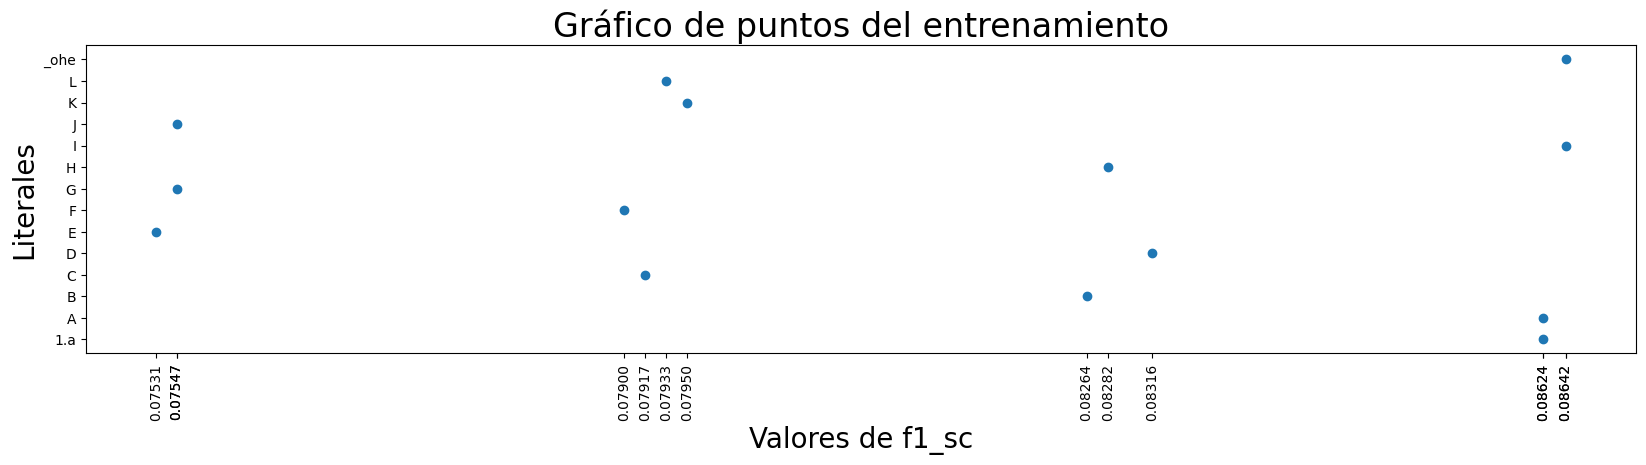

In [378]:
import matplotlib.pyplot as plt

# Definimos los datos de la lista f1_sc
x_vals = ['1.a','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L','_ohe']

# Creamos la figura con un tamaño de 20x10
plt.figure(figsize=(20, 4))

# Creamos el gráfico de puntos con los valores de los ejes invertidos
plt.scatter(f1_sc, x_vals)

# Configuramos los ejes y el título
plt.xlabel('Valores de f1_sc',fontsize=20)
plt.ylabel('Literales',fontsize=20)
plt.title('Gráfico de puntos del entrenamiento', fontsize=24)

# Configuramos las etiquetas del eje y
# Configuramos las etiquetas del eje y y rotamos las del eje x
plt.xticks(rotation=90)

plt.xticks(f1_sc)

# Mostramos el gráfico
plt.show()

Observamos con sorpresa que los diferentes métodos dan valores diferentes.¿podria ocurrir que la diferencia se deba a el algoritmo? para que los resultados sean reproducibles y que no cambie cada vez que se ejecute el código, se establece `random_state=123` (Si los resultados tienen la posibilidad de variar cada vez que se ejecuta el código. Esto puede dificultar la comparación de modelos y la reproducción de resultados.)
Como observacion adicional vemos que importa el orden en el que escribimos las variables (o bien el numero que asignamos a la variable categórica)

Respecto de 0.07531 el valor 0.8642 tiene un 15.11% de incremento. 
